In [1]:
#Written in JupyterLab Version 3.6.3
#Python 3.10
#pip 23.1.2
import pandas as pd #Version 2.0.1
import numpy as np #Version 1.23.5
import matplotlib.pyplot as plt #Version 3.7.1
import scipy.stats #Version 1.10.1
from scipy.stats import norm
import os

In [2]:
#file downloaded from repository and accessed locally, due to formatting issues when accessing repository file
full_filepath = './data/cleaned_data/full_df.csv'
full_df = pd.read_csv(full_filepath)
full_df

,FEDFUNDS,Owner-Occupied-Home-Proportion,30-Year-Mortgage-Rate,Consumer-Price-Index,Year,Month,Quarter,Region,Home Size,Average Sales Price,Number of Households (Thousands),Median Income - Current Dollars,Median Income - 2022 Dollars,Mean Income - Current Dollars,Mean Income - 2022 Dollars,Year-Quarter-Month
0,0.07,64.9,4.432,235.288,2014,January,Q1,Midwest,Double,88200.0,27460.0,54270.0,65640.0,73480.0,88890.0,2014-Q1-January
1,0.07,64.9,4.432,235.288,2014,January,Q1,Midwest,Single,51400.0,27460.0,54270.0,65640.0,73480.0,88890.0,2014-Q1-January
2,0.07,64.9,4.432,235.288,2014,January,Q1,Midwest,Total1,72000.0,27460.0,54270.0,65640.0,73480.0,88890.0,2014-Q1-January
3,0.07,64.9,4.432,235.288,2014,January,Q1,Northeast,Double,92600.0,22180.0,59210.0,71620.0,83720.0,101300.0,2014-Q1-January
4,0.07,64.9,4.432,235.288,2014,January,Q1,Northeast,Single,48700.0,22180.0,59210.0,71620.0,83720.0,101300.0,2014-Q1-January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570,4.10,65.9,6.364,298.812,2022,December,Q4,United States,Single,80200.0,131400.0,74580.0,74580.0,106400.0,106400.0,2022-Q4-December
1571,4.10,65.9,6.364,298.812,2022,December,Q4,United States,Total1,122100.0,131400.0,74580.0,74580.0,106400.0,106400.0,2022-Q4-December
1572,4.10,65.9,6.364,298.812,2022,December,Q4,West,Double,162400.0,29440.0,82890.0,82890.0,117500.0,117500.0,2022-Q4-December
1573,4.10,65.9,6.364,298.812,2022,December,Q4,West,Single,77600.0,29440.0,82890.0,82890.0,117500.0,117500.0,2022-Q4-December


In [3]:
#Begin distribution analysis with an overview of descriptive statistics for all of the quantitative variables
q_describe= full_df.describe()
q_describe

,FEDFUNDS,Owner-Occupied-Home-Proportion,30-Year-Mortgage-Rate,Consumer-Price-Index,Year,Average Sales Price,Number of Households (Thousands),Median Income - Current Dollars,Median Income - 2022 Dollars,Mean Income - Current Dollars,Mean Income - 2022 Dollars
count,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000,1575.000000
mean,0.847143,64.672381,3.960538,254.081419,2017.942857,83472.317460,51232.761905,65156.266667,74205.466667,92139.161905,104891.009524
std,0.940266,1.097227,0.789526,17.707994,2.593225,28742.852302,39515.391302,8213.443053,6707.080521,12238.894333,9943.584316
min,0.050000,63.100000,2.684000,234.747000,2014.000000,33900.000000,22030.000000,49660.000000,60060.000000,70990.000000,85870.000000
25%,0.090000,63.800000,3.470000,238.080000,2016.000000,59350.000000,27460.000000,58310.000000,69310.000000,81960.000000,96300.000000
50%,0.380000,64.400000,3.895000,250.792000,2018.000000,81700.000000,29100.000000,64280.000000,74380.000000,91610.000000,104100.000000
75%,1.550000,65.400000,4.265000,259.951000,2020.000000,100300.000000,49760.000000,70780.000000,78350.000000,102200.000000,111700.000000
max,4.100000,68.000000,6.900000,298.812000,2022.000000,178200.000000,131400.000000,82890.000000,86820.000000,117500.000000,125200.000000


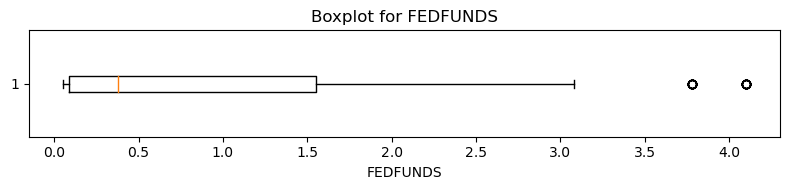

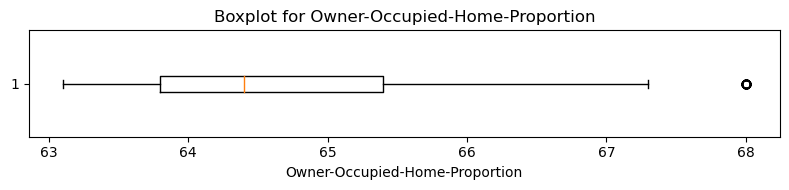

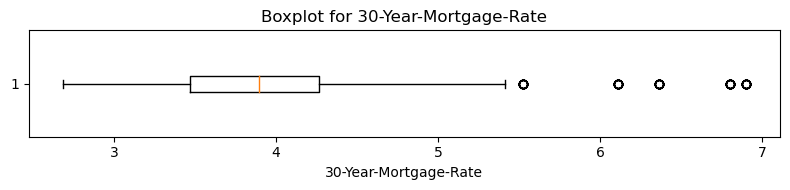

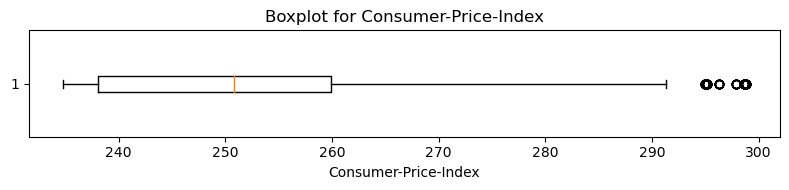

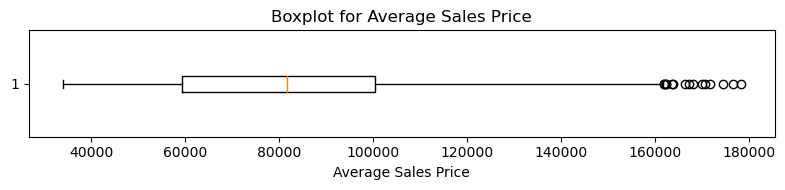

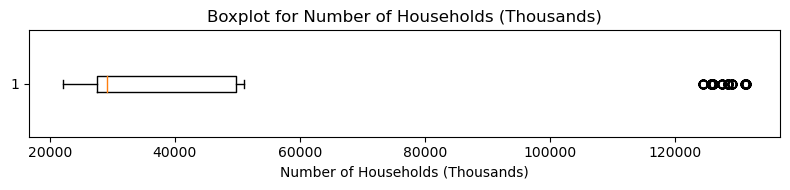

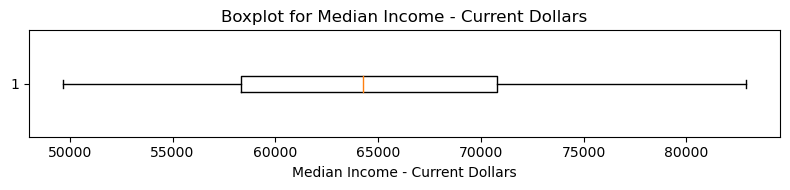

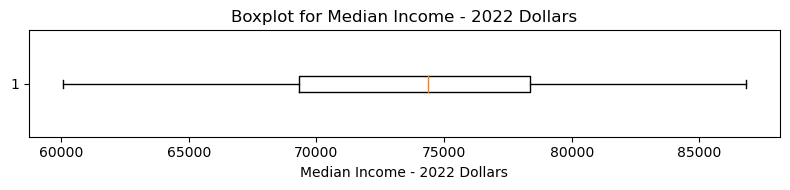

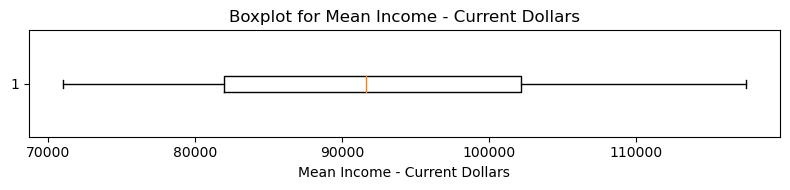

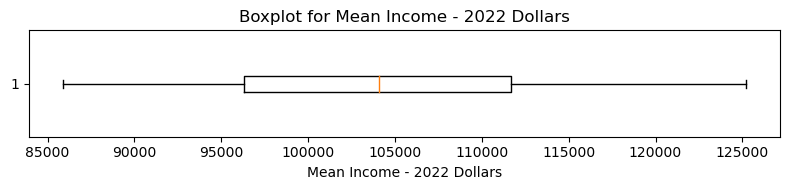

In [4]:
#Visualize the Interquartile Ranges(IQR) of these variables with small multiples of boxplots
q_cols = q_describe.columns
q_cols = q_cols.drop('Year')
for col in q_cols:
    fig, ax = plt.subplots(figsize=(8,2))  # Create a new figure for each column
    var_data = full_df[col]  # Get the data for the current column
    boxplots = ax.boxplot(var_data, vert=False)  # Create the boxplot
    ax.set_title(f'Boxplot for {col}')  # Set the title of the plot
    ax.set_xlabel(col)  # Set the x-axis label
    plt.tight_layout()  # Adjust the spacing between subplots
    plt.show()  # Display the plot

Next we can compare boxplot results with histogram results with varying bins.

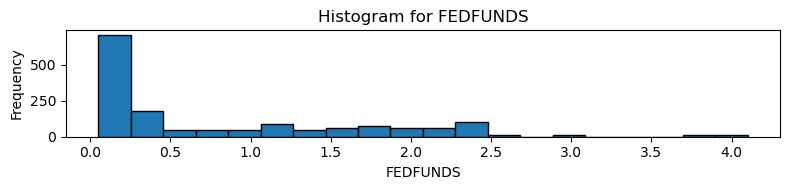

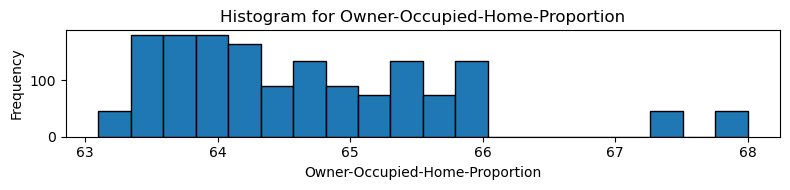

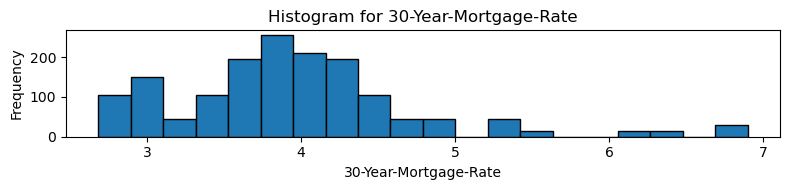

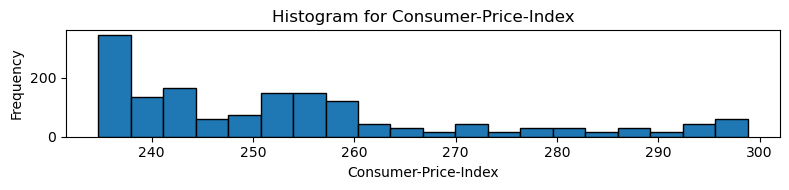

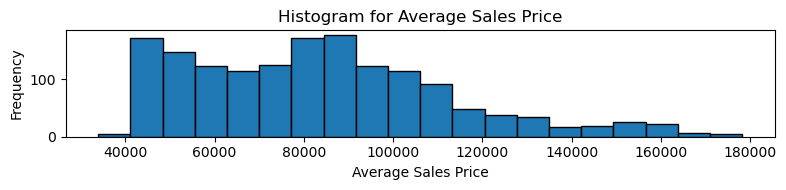

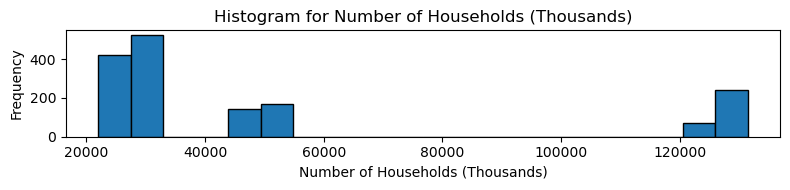

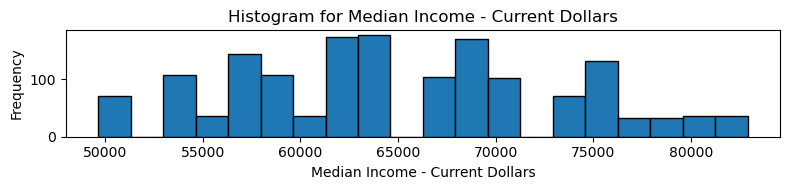

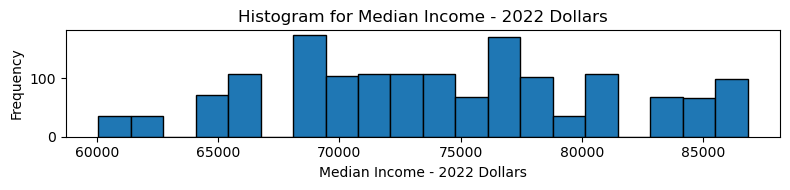

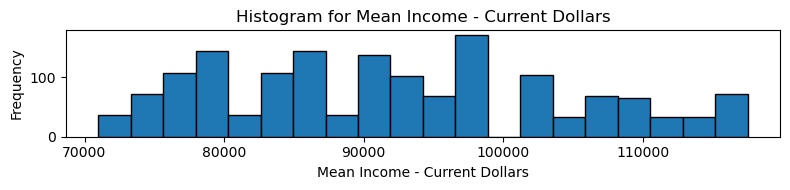

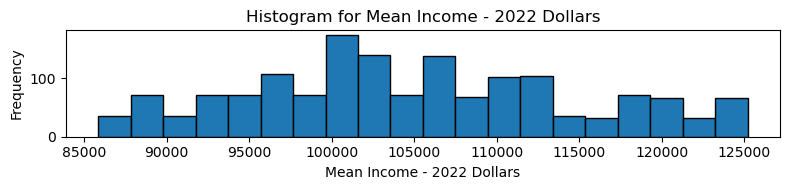

In [5]:
for col in q_cols:
    fig, ax = plt.subplots(figsize=(8, 2))  # Create a new figure for each column
    var_data = full_df[col]  # Get the data for the current column
    ax.hist(var_data, bins=20, edgecolor='black')  # Create the histogram
    ax.set_title(f'Histogram for {col}')  # Set the title of the plot
    ax.set_xlabel(col)  # Set the x-axis label
    ax.set_ylabel('Frequency')  # Set the y-axis label
    plt.tight_layout()  # Adjust the spacing between subplots
    plt.show()  # Display the plot

The histograms illustrate the frequency distribution which is omitted by the boxplots. From these histograms we can observe how frequently outliers occurred for the previously identified variables. 

It will be insightful to see how increasing the number of bins affects the histograms.

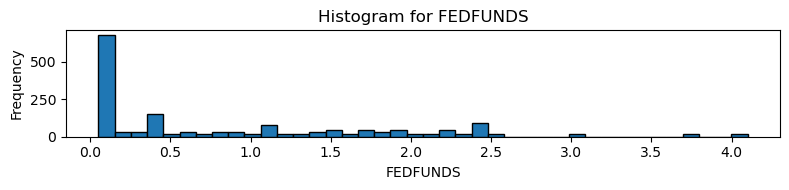

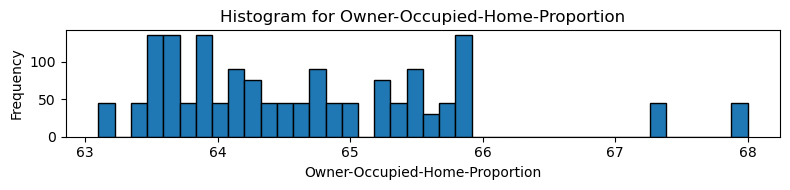

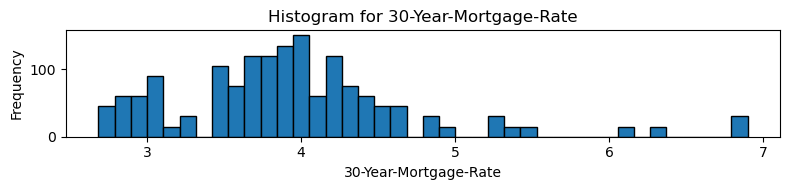

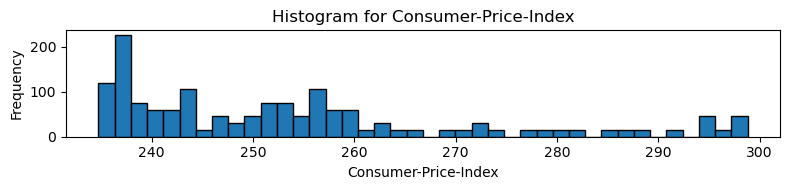

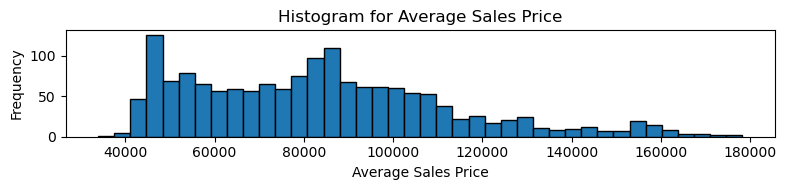

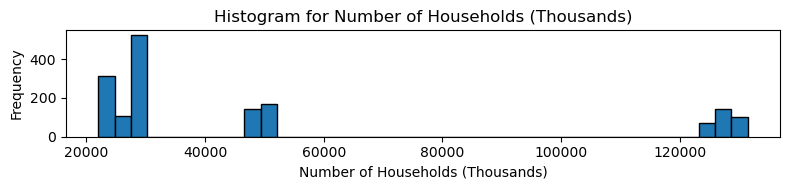

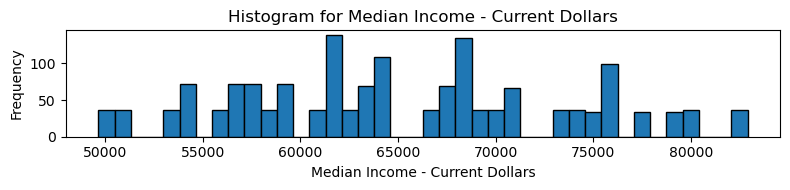

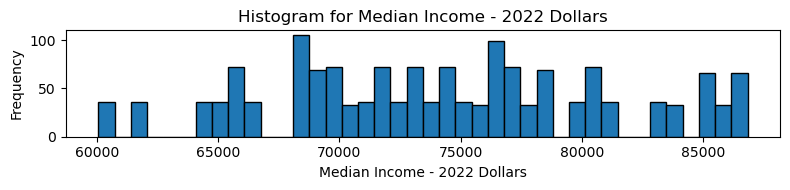

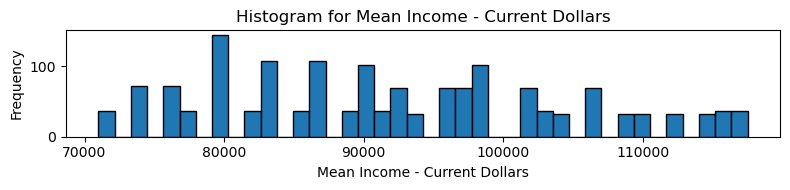

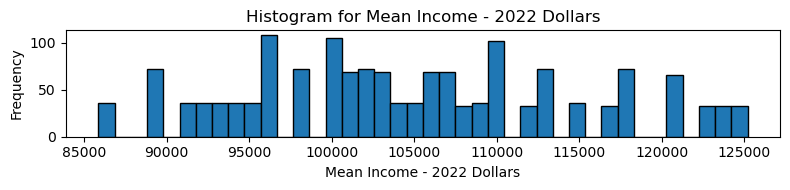

In [6]:
for col in q_cols:
    fig, ax = plt.subplots(figsize=(8, 2))  # Create a new figure for each column
    var_data = full_df[col]  # Get the data for the current column
    ax.hist(var_data, bins=40, edgecolor='black')  #Double amount of bins
    ax.set_title(f'Histogram for {col}')  # Set the title of the plot
    ax.set_xlabel(col)  # Set the x-axis label
    ax.set_ylabel('Frequency')  # Set the y-axis label
    plt.tight_layout()  # Adjust the spacing between subplots
    plt.show()  # Display the plot

More bins for the histograms makes the average income variables appear to be less normally distributed than previously observed. 

To rule out observational error like this it is necessary to determine the level of kurtosis (skew).

In [7]:
skew=dict()
for col in q_cols:
    var_data = full_df[col]  
    skew[col] = scipy.stats.kurtosis(var_data,fisher=True)

In [8]:
skew

{'FEDFUNDS': 0.646859085072871,
 'Owner-Occupied-Home-Proportion': 0.9500523572263475,
 '30-Year-Mortgage-Rate': 2.8061189297666917,
 'Consumer-Price-Index': 0.28259856490867685,
 'Average Sales Price': 0.17290667446576657,
 'Number of Households (Thousands)': -0.018790418163503464,
 'Median Income - Current Dollars': -0.7548720418159109,
 'Median Income - 2022 Dollars': -0.7195491699717458,
 'Mean Income - Current Dollars': -0.817134251808183,
 'Mean Income - 2022 Dollars': -0.7381797899436005}

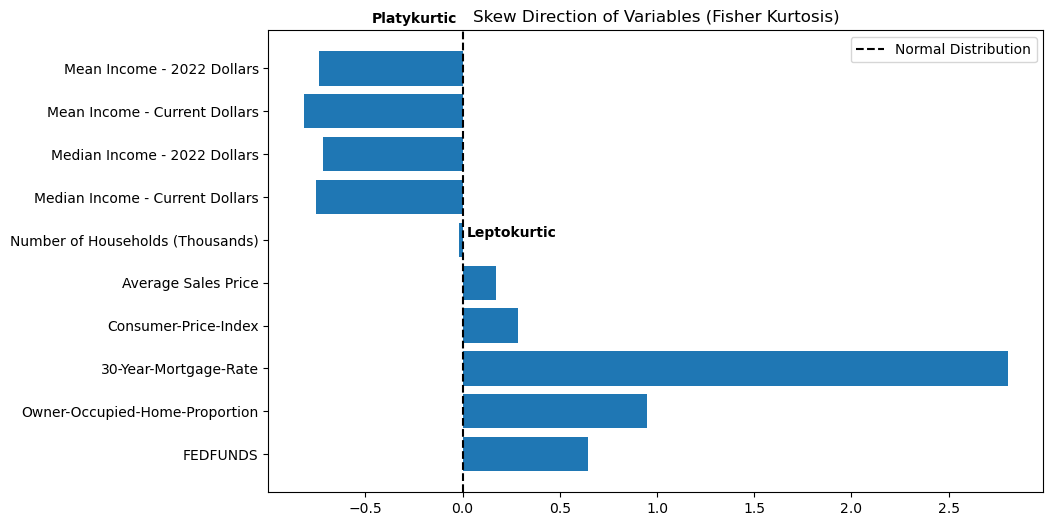

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.barh(q_cols,skew.values())
ax.set_title('Skew Direction of Variables (Fisher Kurtosis)')
# Add vertical line at x=0 to separate leptokurtic and platykurtic regions
ax.axvline(x=0, color='k', linestyle='--', label='Normal Distribution')
# Label the leptokurtic and platykurtic regions
ax.text(0.25, len(skew)-5, 'Leptokurtic', fontweight='bold', ha='center', va='bottom')
ax.text(-0.25, len(skew), 'Platykurtic', fontweight='bold', ha='center', va='bottom')
ax.legend()

The significant insights we can elucidate from this are:

1. All average income distributions skew to the left (platykurtic).
2. Interest Rates, Owner-Occupied-Home-Proportion, 30-Year-Mortgage-Rate,Consumer-Price-Index, and Average Sales Price all skewed to the right (leptokurtic).
3. Number of Households has a very slight negative skew, but it is small enough to be considered normally distributed.

Since there is only one normally distributed variable out of the 10, here is a follow up visualization for Number of Households (Thousands). 

In [10]:
#Find mean Number of Households for United States, Northeast, Midwest, West, and South.
national = full_df[(full_df['Region'] == 'United States')]
nat_samp = national['Number of Households (Thousands)']
nat_mean = np.mean(nat_samp)

ne = full_df[(full_df['Region'] == 'Northeast')]
ne_samp = ne['Number of Households (Thousands)']
ne_mean = np.mean(ne_samp)

mw = full_df[(full_df['Region'] == 'Midwest')]
mw_samp = mw['Number of Households (Thousands)']
mw_mean = np.mean(mw_samp)

w = full_df[(full_df['Region'] == 'West')]
w_samp = w['Number of Households (Thousands)']
w_mean = np.mean(w_samp)

s = full_df[(full_df['Region'] == 'South')]
s_samp = s['Number of Households (Thousands)']
s_mean = np.mean(s_samp)

reg_means = [ne_mean, mw_mean, w_mean,s_mean]

#Use mean values to solve for proportion of regional sample to national sample

reg_props = [str(round(mean/nat_mean,3)*100)+'%' for mean in reg_means]

reg_props

['17.5%', '21.6%', '22.6%', '38.3%']

In [11]:
#Add National Mean to list to be plotted
reg_means.append(nat_mean)
print(reg_means)

[22353.714285714286, 27719.04761904762, 28902.095238095237, 49109.90476190476, 128079.04761904762]


In [12]:
# Sort the data in ascending order
asc_df = full_df.sort_values(by='Number of Households (Thousands)')
regions = asc_df['Region'].unique()
print(regions)

['Northeast' 'Midwest' 'West' 'South' 'United States']


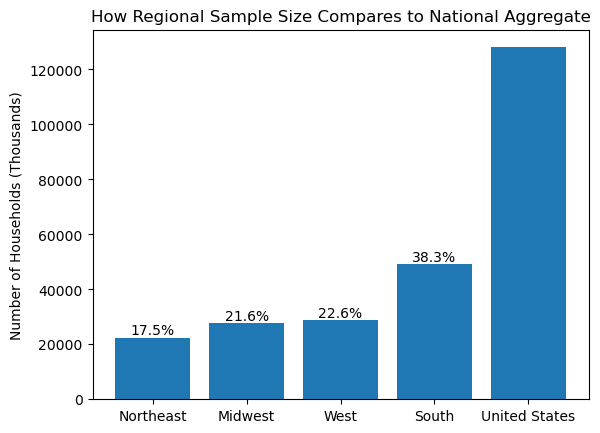

In [13]:

fig, ax = plt.subplots()

bars = ax.bar(regions,reg_means)
ax.set_ylabel('Number of Households (Thousands)')
ax.set_title('How Regional Sample Size Compares to National Aggregate')

for bar, prop in zip(bars, reg_props):
    height = bar.get_height()
    ax.annotate(prop,
                xy=(bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom',
                ) 
plt.show()

Intuitively it is unusual that this Number of Households is normally distributed based on what it represents. Upon further investigation of the formulas underlying Kurtosis it was determined that Kurtosis for discrete variables is calculated differently than for continuous variables. 

The inherent difference in the definitions of probability distribution for both variables explains why the same scipy Kurtosis was only correct for continuous variables.

The Number of Households variable represents sample size by Region, followed by sample size for the aggregate United States. This is useful to elucidate how influential each regional value (ex:Average Income/Sales Price) is for the aggregate national value. 